In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [33]:
# 1. Problem (case study)
#      · Data Description.
#          - We have a database of Healthcare Donors since 1997
#      · Goal.
#          - The goal is to develop a model that will help maximize net revenue.
#             · Focusing in the individuals who made their last donation 13-24 months ago
#             · And netting in very low dollar donors.


In [34]:
# 2. Getting Data
#       · Read the .csv file.
marketing_df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
m_df = marketing_df.copy()

In [35]:
# 3. Cleaning/Wrangling/EDA
#       · Change headers names.
# cols = []
# for column in m_df.columns:
#     cols.append(column.lower())
# m_df.columns = cols
m_df = m_df.rename(columns={'Total Claim Amount': 'claim'})

In [36]:
#       · Deal with NaN values. (they are clean already)
# nulls_df = pd.DataFrame(round(m_df.isna().sum()/len(m_df),4)*100)
# nulls_df = nulls_df.reset_index()
# nulls_df.columns = ['header_name', 'percent_nulls']
#m_df.isna().sum()

In [37]:
#       · Categorical Features.
categorical = m_df.select_dtypes(include=[object])
categorical.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [38]:
#       · Numerical Features.
numerical = m_df.select_dtypes(include=[np.number])
numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'claim'],
      dtype='object')

In [39]:
#       · Exploration.

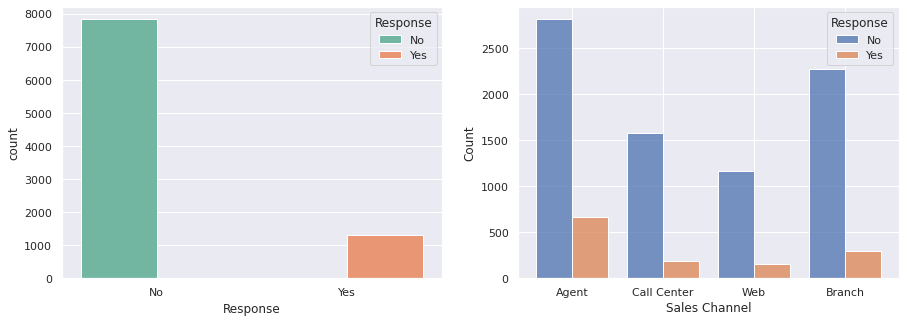

In [40]:
# #Number of responses
fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(5)
sns.countplot(x="Response", data=marketing_df, hue="Response", palette="Set2",ax = ax[0])
g = sns.histplot(data=marketing_df, x='Sales Channel', hue='Response', multiple='dodge', shrink=.8,ax = ax[1])

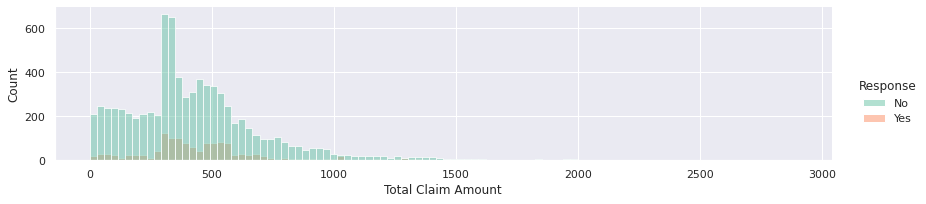

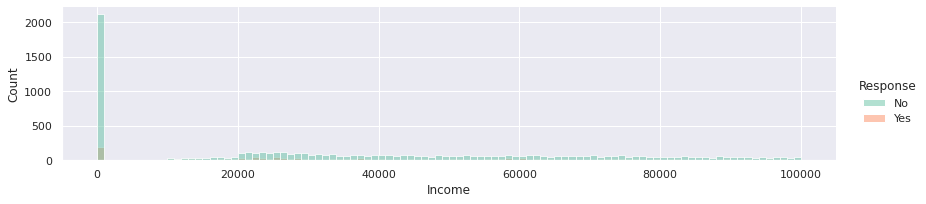

In [41]:
# Response rate by claim and Income
sns.displot(x='Total Claim Amount', hue = 'Response', data = marketing_df, bins = 100, palette="Set2",height=3,aspect=4)
sns.displot(x='Income', hue = 'Response', data = marketing_df, bins = 100, palette="Set2",height=3,aspect=4)

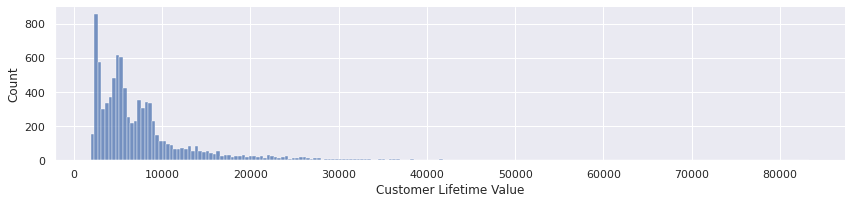

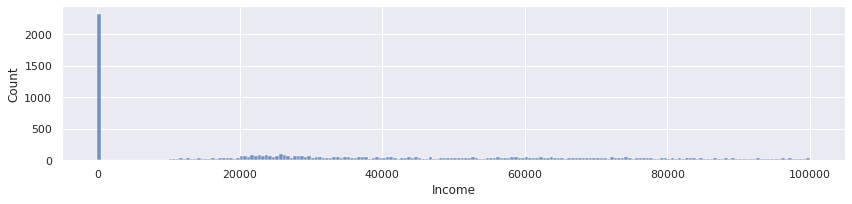

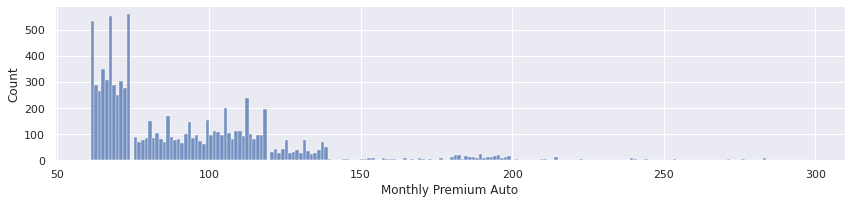

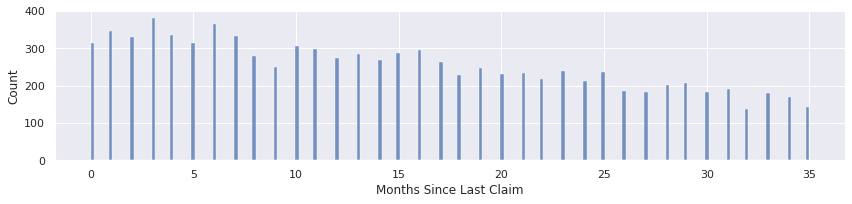

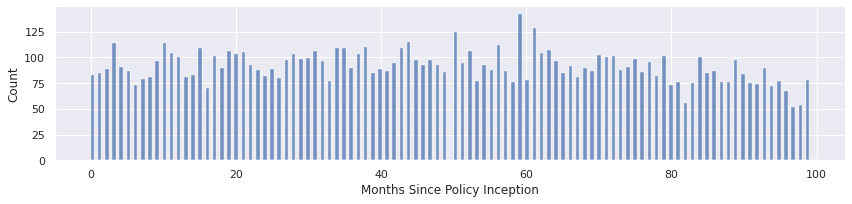

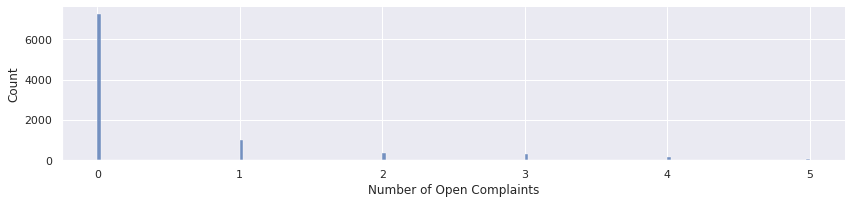

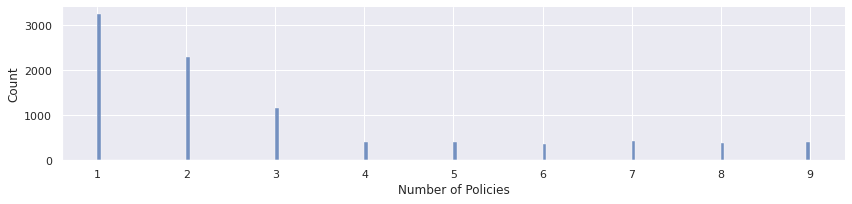

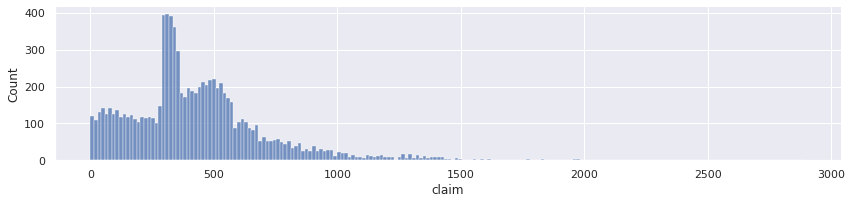

In [42]:
# We check the distributions
for column in numerical.columns:
    sns.displot(x=column, data = numerical, bins = 200, palette="Set1",height=3,aspect=4)
plt.show()
# - customer lifetime value and total claim ammount could be reinterpreted with log in order to fit a notmal dist
# - we could also get rid of 0 income in order to get some value from that data

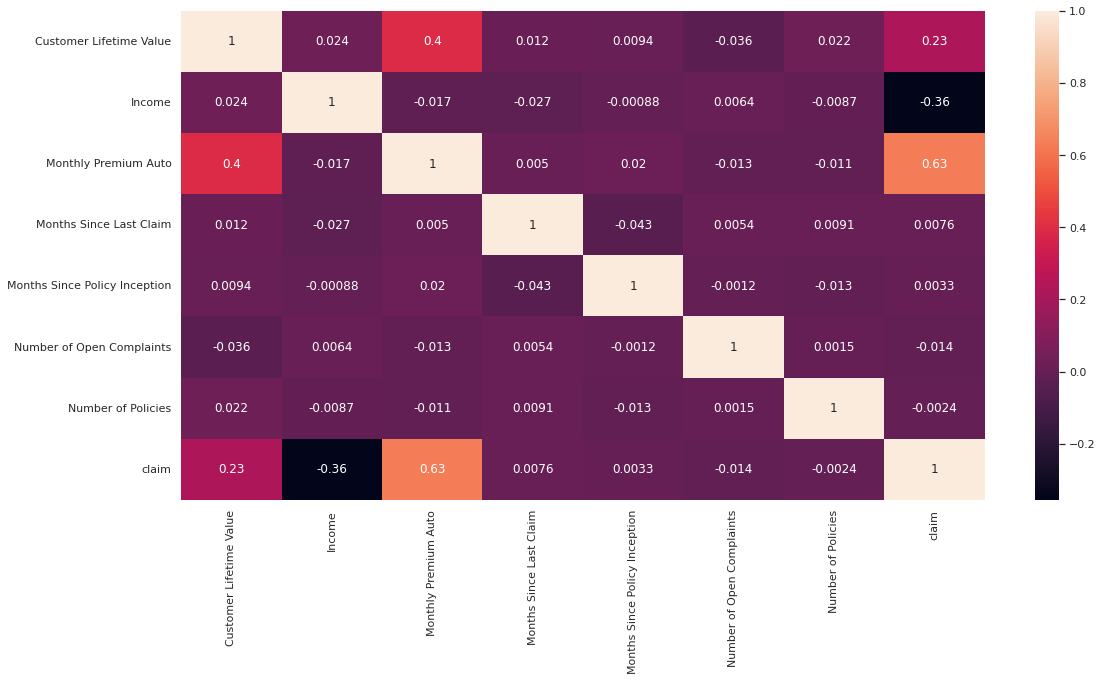

In [43]:
# We show the heatmap in order to see correlations
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
# As we can see there are no direct correlation (higher than 0.9) between features

In [44]:
m_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'claim', 'Vehicle Class',
       'Vehicle Size'],
      dtype='object')

In [45]:
# 4. Processing Data
m_df = m_df.drop(['Customer','Effective To Date'], axis = 1)

shape before:  (8665, 24)
shape after:  (8665, 23)


<AxesSubplot:>

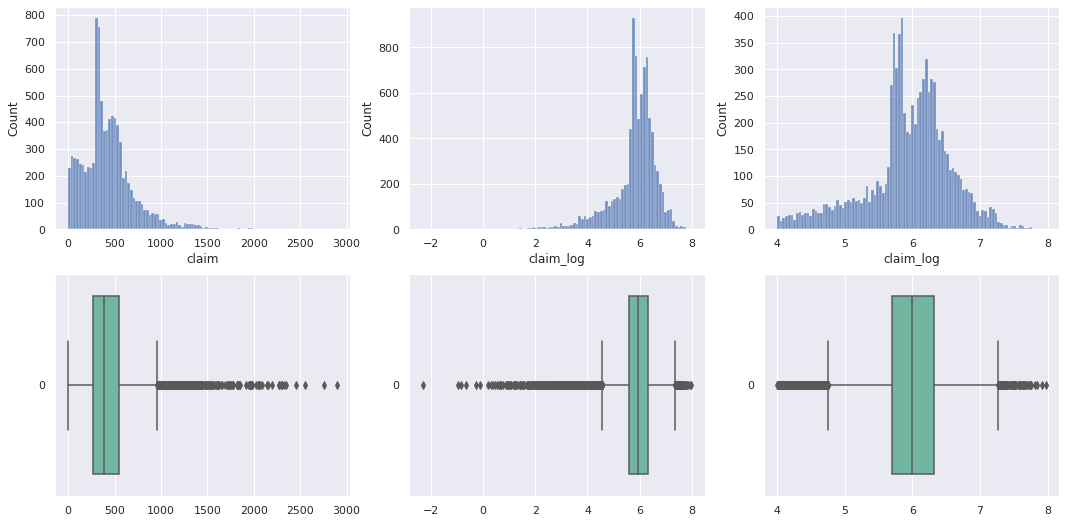

In [31]:
#       · Dealing with outliers.
# As we can see in this graph, the data is positivele skewed for Y
# Therefore, we have to transform the y value
claim_log = np.log(m_df.claim)
m_df['claim_log'] = claim_log

# I will get rid of the values below 7.5 and above 4.5  later on when we get 
print("shape before: ", m_df_clean.shape)
m_df_clean = m_df[m_df['claim_log']>4]
m_df_clean = m_df_clean[m_df_clean['claim_log']<8]
print("shape after: ", m_df_clean.shape)

# Now we can see that the data looks more 'normalized'
sns.set(rc={'figure.figsize':(18,9)})
fig, ax = plt.subplots(2,3)
sns.histplot(x='claim', data = m_df, bins = 100, ax = ax[0,0])
sns.boxplot(data=m_df.claim, orient="h", palette="Set2", ax = ax[1,0])
sns.histplot(x='claim_log', data = m_df, bins = 100, ax = ax[0,1])
sns.boxplot(data=m_df.claim_log, orient="h", palette="Set2", ax = ax[1,1])
sns.histplot(x='claim_log', data = m_df_clean, bins = 100, ax = ax[0,2])
sns.boxplot(data=m_df_clean.claim_log, orient="h", palette="Set2", ax = ax[1,2])

<AxesSubplot:>

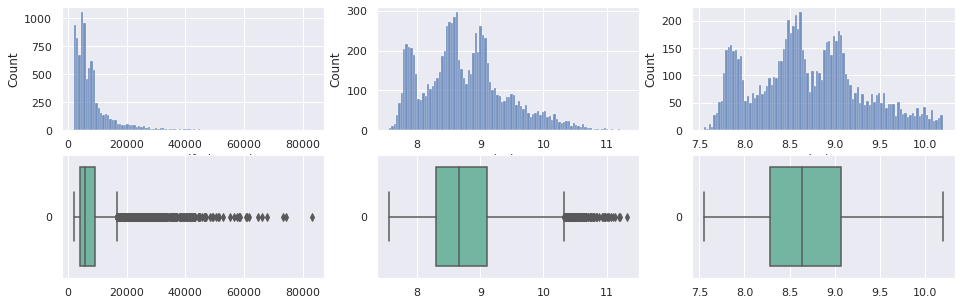

In [24]:
# Same with customer lifetime value:
clv_log = np.log(m_df_clean[['Customer Lifetime Value']])
m_df_clean['clv_log'] = clv_log
sns.set(rc={'figure.figsize':(16,5)})

# I will get rid of the values below above 10.4
m_df_clean2 = m_df_clean[m_df_clean['clv_log']<10.2]

fig, ax = plt.subplots(2,3)
sns.histplot(x='Customer Lifetime Value', data = m_df_clean, bins = 100, ax = ax[0,0])
sns.boxplot(data=m_df_clean['Customer Lifetime Value'], orient="h", palette="Set2", ax = ax[1,0])
sns.histplot(x='clv_log', data = m_df_clean, bins = 100, ax = ax[0,1])
sns.boxplot(data=m_df_clean.clv_log, orient="h", palette="Set2", ax = ax[1,1])
sns.histplot(x='clv_log', data = m_df_clean2, bins = 100, ax = ax[0,2])
sns.boxplot(data=m_df_clean2.clv_log, orient="h", palette="Set2", ax = ax[1,2])

In [25]:
# Same with monthly premium auto, but first we apply a transformation power trans:
from sklearn import preprocessing
# scaler = preprocessing.PowerTransformer().fit(m_df_clean2[['Monthly Premium Auto']])
# mpa_scal = scaler.transform(m_df_clean2[['Monthly Premium Auto']])
# m_df_clean2['mpa_scal'] = mpa_scal

# mpa_log = np.log(m_df_clean3.mpa_scal)
# m_df_clean3['mpa_log'] = mpa_log


# # I will get rid of the values below above 10.4
# m_df_clean3 = m_df_clean2.copy()
# m_df_clean3 = m_df_clean3[m_df_clean3['mpa_log']>-1]
# m_df_clean3.dropna()
# m_df_clean3.reset_index(drop=True, inplace=True)

# sns.set(rc={'figure.figsize':(19,9)})
# fig, ax = plt.subplots(2,3)
# sns.histplot(x='Monthly Premium Auto', data = m_df, bins = 100, ax = ax[0,0])
# sns.boxplot(data=m_df['Monthly Premium Auto'], orient="h", palette="Set2", ax = ax[1,0])
# sns.histplot(x='mpa_scal', data = m_df_clean3, bins = 100, ax = ax[0,1])
# sns.boxplot(data=m_df_clean3.mpa_scal, orient="h", palette="Set2", ax = ax[1,1])
# sns.histplot(x='mpa_log', data = m_df_clean3, bins = 100, ax = ax[0,2])
# sns.boxplot(data=m_df_clean3.mpa_log, orient="h", palette="Set2", ax = ax[1,2])

<AxesSubplot:>

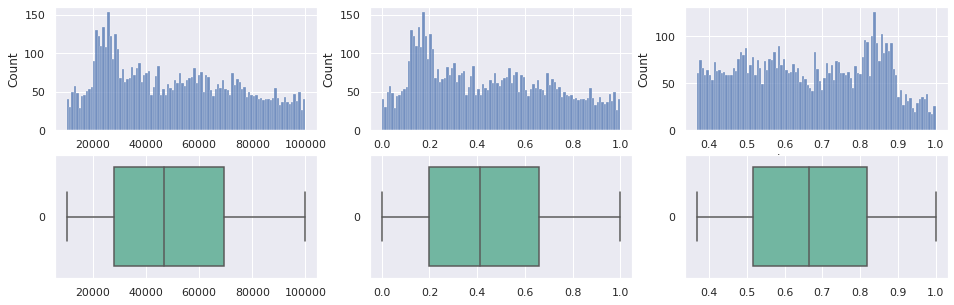

In [26]:
# I will get rid of the value income = 0
m_df_clean2 = m_df_clean2[m_df_clean2['Income']!=0]

# Lets see how scaler transform works with neg exponential:
scaler = preprocessing.MinMaxScaler().fit(m_df_clean2[['Income']])
income_scal = scaler.transform(m_df_clean2[['Income']])
m_df_clean2['income_scal'] = income_scal

income_expn = np.exp(-m_df_clean2.income_scal)
m_df_clean2['income_expn'] = income_expn

fig, ax = plt.subplots(2,3)
sns.histplot(x='Income', data = m_df_clean2, bins = 100, ax = ax[0,0])
sns.boxplot(data=m_df_clean2.Income, orient="h", palette="Set2", ax = ax[1,0])
sns.histplot(x='income_scal', data = m_df_clean2, bins = 100, ax = ax[0,1])
sns.boxplot(data=m_df_clean2.income_scal, orient="h", palette="Set2", ax = ax[1,1])
sns.histplot(x='income_expn', data = m_df_clean2, bins = 100, ax = ax[0,2])
sns.boxplot(data=m_df_clean2.income_expn, orient="h", palette="Set2", ax = ax[1,2])

In [27]:
# And we get rid of the unsused columns and reindex all
m_df_clean3 = m_df_clean2.copy()
m_df_clean3 = m_df_clean3.drop(['Monthly Premium Auto'], axis = 1)
m_df_clean3 = m_df_clean3.drop(['mpa_scal'], axis = 1)
m_df_clean3 = m_df_clean3.drop(['Customer Lifetime Value'], axis = 1)
m_df_clean3 = m_df_clean3.drop(['Income'], axis = 1)
m_df_clean3 = m_df_clean3.drop(['income_scal'], axis = 1)
m_df_clean3 = m_df_clean3.drop(['claim'], axis = 1)
m_df_clean3.reset_index(drop=True, inplace=True)

KeyError: "['mpa_scal'] not found in axis"

In [ ]:
m_df_clean3.isna().sum()

In [28]:
m_df_clean3.shape

(6191, 25)

In [29]:
m_df.shape

(9134, 23)

In [ ]:
#       · X-Y Split
X = m_df_clean3.drop(['claim_log'], axis = 1)
y = m_df_clean3[['claim_log']]

In [ ]:
numerical_X = X.select_dtypes(include=[np.number])
categorical_X = X.select_dtypes(include=[object])

In [ ]:
#       · Normalization for numerical X
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler().fit(numerical_X).transform(numerical_X)
numerical_X_stand = pd.DataFrame(standard_X,columns=numerical_X.columns)

In [ ]:
#       · Encoding Categorical Data.
# We change names by data for some features (the ones that can be ordered)
cat = categorical_X.copy()
cat = cat[['Education','Coverage','Response']]
mapping = {'No':0,'Yes':1}
cat = cat.replace({'Response': mapping})
mapping = {'Basic':0,'Extended':1,'Premium':2}
cat = cat.replace({'Coverage': mapping})
mapping = {'High School or Below':0,'College':1,'Bachelor':2,'Master':3,'Doctor':4}
cat = cat.replace({'Education': mapping})

# # We apply a normalizer for cat
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(cat)
normalized = transformer.transform(cat)
cat_norm = pd.DataFrame(normalized, columns = cat.columns)


# We define the function that we will use in OneHotColum
def oneHotColumn(col_transform):
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(col_transform)
    onehotlabels = enc.transform(col_transform).toarray()
    return pd.DataFrame(onehotlabels,columns = enc.categories_)

# We apply OneHotColum to the other features of the frame
cat2 = categorical_X.copy()
cat2.drop(cat.columns, axis = 1, inplace = True)
concat_categorical = pd.DataFrame()# categorical[['Customer']]
for col in cat2.columns:
      df_from_column = oneHotColumn(cat2[[col]])
      concat_categorical = pd.concat([concat_categorical,df_from_column], axis=1)#
    
    
# I add this for rows in order to get rid of the warning , it returns the properly column string names instead of tupples
# ------- warning code -----------------------
new_columns = []
for column in concat_categorical.columns:
    new_columns.append(column[0])
concat_categorical.columns = new_columns
# ------- warning code -----------------------

cat2 = concat_categorical

categorical_encoded = pd.concat([cat_norm,cat2], axis=1) 

In [ ]:
# First we get back X all together:
X_tot = pd.concat([categorical_encoded,numerical_X_stand], axis=1) 

In [ ]:
#       · Splitting into train set and test set.
X_train, X_test, y_train, y_test = train_test_split(X_tot, y, test_size=0.33, random_state=100)

In [ ]:
# 5. Modeling
#       · Apply model.
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# 6. Model Validation
#       · R2.
#       · MSE.
#       · RMSE.
#       · MAE.
y_pred = reg.predict(X_test)
y_true = y_test
print("The R2 is: ",r2_score(y_true, y_pred))
print("The MSE is: ",mean_squared_error(y_true, y_pred, squared=True))
print("The RMSE is: ",mean_squared_error(y_true, y_pred, squared=False))
print("The MAE is: ",mean_absolute_error(y_true, y_pred))

In [ ]:
# 7. Reporting
#       · Present results.
